<a href="https://colab.research.google.com/github/Aayushi-Sharma24/Face_Emotion_Recognition/blob/main/Face_Emotion_Recognition_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

###The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

###Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

###In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

###While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


###We will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.

##Face Emotion Recognition
###This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.

##Dataset Information

The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised. Here is the dataset link:- https://www.kaggle.com/msambare/fer2013

##Importing Required Libraries

In [ ]:
# importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras import regularizers

##Using DeepFace

###Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.

In [ ]:
#installing deep face 
!pip install deepface

     |████████████████████████████████| 61 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 15.7 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=c8e52a6203d6f499906cbf9b7e6f104fcf72daa05f542f52dc7a3dda5022ced3
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
#calling the dependencies
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt 

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
#confirming the path of images
img1 = cv2.imread("/content/sample_data/angelina jolie1.jpg")
img2 = cv2.imread("/content/sample_data/angelina-jolie2.jpg") 

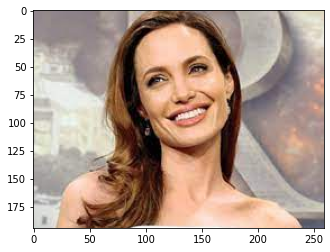

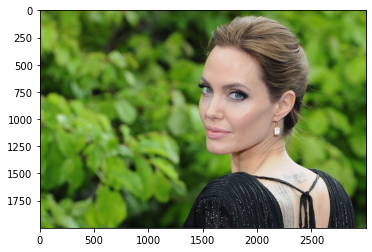

In [ ]:
# plotting images 
plt.imshow(img1[:, :, ::-1 ]) #setting value as -1 to maintain saturation
plt.show()
plt.imshow(img2[:, :, ::-1 ]) 
plt.show() 

###It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace and Dlib. The library is mainly based on Keras and TensorFlow.

In [ ]:
#calling VGGFace
model_name = "VGG-Face"
model = DeepFace.build_model(model_name)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:05<00:00, 99.0MB/s]


###Calling verify function


In [ ]:
#using verify function

#validate our images
result = DeepFace.verify("/content/sample_data/angelina jolie1.jpg","/content/sample_data/angelina-jolie2.jpg")
#generating result of comparison 
DeepFace.verify(img1,img2)

{'distance': 0.38277914229206367,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'verified': True}


###In Output result we can see that both images are same and our model is also predicting the same.

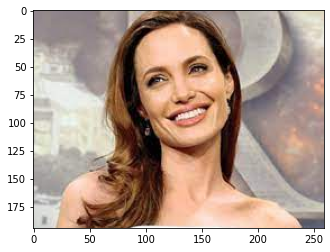

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]




30  years old  white   happy   Woman


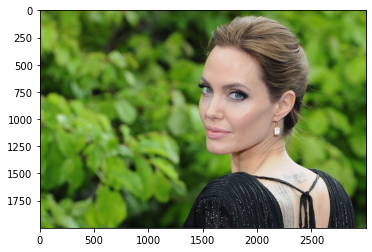

Action: emotion: 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]



35  years old  white   disgust   Woman


In [ ]:
 #setting value as -1 to maintain saturation
 plt.imshow(img1[:, :, ::-1 ])
 plt.show()
 #creating an object to analyze facial features
 obj = DeepFace.analyze(img_path = img1, actions = ['age', 'gender', 'race', 'emotion'])
 print("\n")
 #checking age, race, emotion and gender using DEEPFACE for image 1
 print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

 plt.imshow(img2[:, :, ::-1 ]) 
 plt.show()
 #creating an object to analyze facial features
 obj = DeepFace.analyze(img_path = img2, actions = ['age', 'gender', 'race', 'emotion'])
 print("\n")
 #checking age, race, emotion and gender using DEEPFACE for image 2
 print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

### In the first image emotion is correctly predicted by model which is happy but in second image the emotion is incorrectly predicted.

###Let's verify model with more images

In [ ]:
 #setting path for different image
 img3_path = "/content/sample_data/rbj2.jpg" 
 img3 = cv2.imread(img3_path)

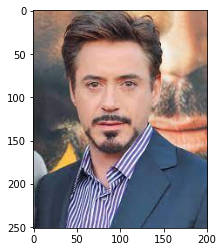

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]



27  years old  latino hispanic   angry   Man


In [ ]:
 plt.imshow(img3[:, :, ::-1 ]) 
 plt.show()
 #creating an object to analyze facial features
 obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'])
 print("\n")
 #checking age, race, emotion and gender using DEEPFACE for image 3
 print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

### The emotion predicted by model is **angry** which is incorrect , it should be neutral emotion

###The Deep Face model is not giving us good results. Let's try another approach.

In [ ]:
 #comparing the faces in images using VGG Face
 DeepFace.verify(img1, img3) 

{'distance': 0.6366621327888169,
 'max_threshold_to_verify': 0.4,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'verified': False}

##Using Transfer Learning

###Transfer learning is the reuse of a pre-trained model on a new problem.
###In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem.
###we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at "task A" to a new "task B."

##VGG16
###VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014.
###The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading Dataset

In [ ]:
# path for train dataset
path="/content/drive/My Drive/Colab Notebooks/Face Emotion Recognition - Aayushi Sharma/Dataset/Training/train"

In [ ]:
# path for test dataset
pathTest = "/content/drive/My Drive/Colab Notebooks/Face Emotion Recognition - Aayushi Sharma/Dataset/Training/test"

(48, 48, 3)


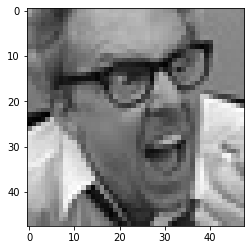

In [ ]:
#Plotting one of the image from train dataset
from keras.preprocessing import image
img = image.load_img(path+"/angry/Training_3908.jpg",target_size=(48,48))
img = np.array(img)
plt.imshow(img)
#checking the shape of the image
print(img.shape)

### Counting number of images for each emotion in training dataset

In [ ]:
# count of emotions.
import os
total_images = 0
for dir_ in os.listdir(path):
    count = 0
    for f in os.listdir(path +"/" +dir_ + "/"):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images are {total_images}")

disgust has 436 number of images
fear has 4097 number of images
angry has 4002 number of images
happy has 7215 number of images
neutral has 4965 number of images
sad has 4830 number of images
surprise has 3171 number of images

total images are 28716


###Implementing Vgg-16

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(48,48,3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#Freezing the layers
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob(path+"/*")

In [ ]:
# flatten vgg output and include output layer according to our use case
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

###Model summary

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

###Compile model

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Data Augmentation  

In [ ]:
#Augumenting Training images
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    validation_split = 0.2,
                                    rotation_range=5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    #zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')


#Augumenting Test images
test_datagen  = ImageDataGenerator( rescale = 1./255 )

# generate training set
training_set = train_datagen.flow_from_directory(path,
                                                 target_size = (48, 48),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

                                                 batch_size = 64)
# generate test set
test_set = test_datagen.flow_from_directory(pathTest,
                                            target_size = (48, 48),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 28716 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Fitting the model

In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
449/449 [==============================] - 6204s 14s/step - loss: 1.7348 - accuracy: 0.2953 - val_loss: 1.6753 - val_accuracy: 0.3305
Epoch 2/5
449/449 [==============================] - 112s 249ms/step - loss: 1.6774 - accuracy: 0.3337 - val_loss: 1.6441 - val_accuracy: 0.3540
Epoch 3/5
449/449 [==============================] - 108s 241ms/step - loss: 1.6610 - accuracy: 0.3401 - val_loss: 1.6404 - val_accuracy: 0.3512
Epoch 4/5
449/449 [==============================] - 108s 240ms/step - loss: 1.6493 - accuracy: 0.3498 - val_loss: 1.6144 - val_accuracy: 0.3672
Epoch 5/5
449/449 [==============================] - 110s 244ms/step - loss: 1.6481 - accuracy: 0.3459 - val_loss: 1.6309 - val_accuracy: 0.3590


###Model Evaluation

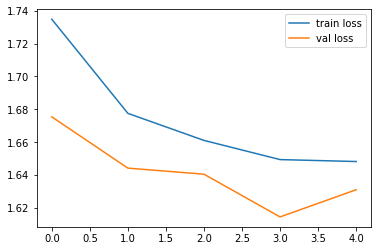

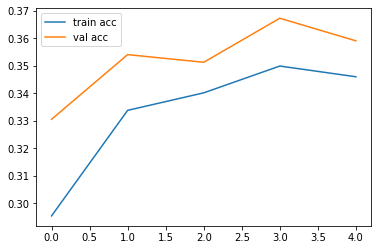

In [ ]:
#Visualization of model performance
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##ResNet50 Model

###ResNet-50 is a convolutional neural network that is 50 layers deep.It is  build on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. The network has an image input size of 224x224. 

###Data Augmentation

In [ ]:
#Augumenting train images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

#Augumenting validation images

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

#Augumenting test images
test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
# generate train set
train_dataset  = train_datagen.flow_from_directory(path,
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

# generate validation set
valid_dataset = valid_datagen.flow_from_directory(path,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

# generate test set
test_dataset = test_datagen.flow_from_directory(pathTest,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 22974 images belonging to 7 classes.
Found 5742 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


###Implementing ResNet-50

In [ ]:
# add preprocessing layer
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

### Customizing last 4 layers of ResNet according to our use case

In [ ]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

###Model summary

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                262176    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [ ]:
# defining evaluation metrics
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

In [ ]:
#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate.

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

###Compile model

In [ ]:
# compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

###Fitting the model

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 20,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/20
359/359 [==============================] - ETA: 0s - loss: 1.7899 - accuracy: 0.8572 - precision: 1.0000 - recall: 8.7055e-05 - auc: 0.6653

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


359/359 [==============================] - 93s 258ms/step - loss: 1.7899 - accuracy: 0.8572 - precision: 1.0000 - recall: 8.7055e-05 - auc: 0.6653 - val_loss: 1.7679 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6835 - lr: 0.0010
Epoch 2/20
359/359 [==============================] - 92s 256ms/step - loss: 1.7877 - accuracy: 0.8571 - precision: 0.5000 - recall: 4.3527e-05 - auc: 0.6671 - val_loss: 1.7716 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6815 - lr: 0.0010
Epoch 3/20
359/359 [==============================] - 93s 260ms/step - loss: 1.7884 - accuracy: 0.8571 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6668 - val_loss: 1.7606 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6904 - lr: 0.0010
Epoch 4/20
359/359 [==============================] - 92s 257ms/step - loss: 1.7852 - accuracy: 0.8571 - precision: 0.5000 - recall: 4.3527e-05 - auc: 0.66

In [ ]:
#saving the model
model.save('Final_model_TL_ResNet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


###Model Evaluation

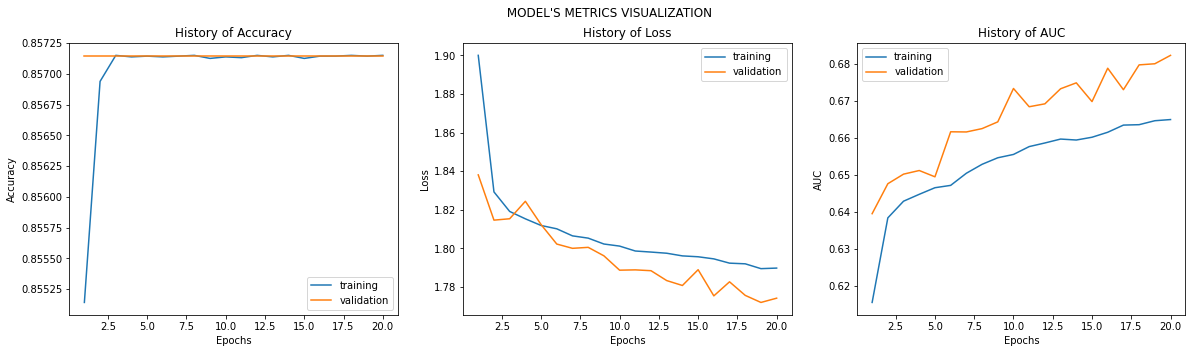

In [ ]:
# created a function to visualize model evaluation metrics
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc):
    
    fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")
    
    #Accuracy
    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    #Loss
    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    # AUC
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    plt.show()
    
#Plot all the metrics plot
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc']
              )

##Inference

###  The training and validation accuracy is 85.71% and training & validation loss also decreased below 1.80

####After verifying from live video this model doesn't seem to work very well in recognizing face emotions. Most of the time it predicted happy face although it was some other expression!!
####Hence i have created a custom CNN model

##Building our own Custom CNN Model

In [ ]:
image_size= 48
batch_size= 64
#Augumenting train images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

#generate train set
training_set = train_datagen.flow_from_directory(path,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
#Augumenting test images
test_datagen = ImageDataGenerator(rescale=1./255)
#generate test set
test_set = test_datagen.flow_from_directory(pathTest,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28716 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


###Creating Custom CNN Model

In [ ]:
#defining function to create custom CNN model
def model_2(input_size, classes=7):
    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #Faltten the model
    model.add(Flatten())
    
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(classes, activation='softmax'))
    opt = Adam(lr=0.0001 , decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary
    return model

###Model Summary

In [ ]:
#model summary
row, col = 48, 48
classes = 7
model_2 = model_2((row,col,1), classes)
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import datetime
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate
checkpoint = ModelCheckpoint(filepath="'model.h5'",
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, reduce_lr, csv_logger]

###Training the model

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

# fit the model
model_2_hist = model_2.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50,
                 callbacks=callbacks_list,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 8.4790 - accuracy: 0.2231 
Epoch 00001: val_loss improved from inf to 7.64356, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/448 [==============================] - 6848s 15s/step - loss: 8.4790 - accuracy: 0.2231 - val_loss: 7.6436 - val_accuracy: 0.1749 - lr: 1.0000e-04
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 6.8460 - accuracy: 0.2612
Epoch 00002: val_loss improved from 7.64356 to 6.07254, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/448 [==============================] - 88s 195ms/step - loss: 6.8460 - accuracy: 0.2612 - val_loss: 6.0725 - val_accuracy: 0.2863 - lr: 1.0000e-04
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 5.4455 - accuracy: 0.2907
Epoch 00003: val_loss improved from 6.07254 to 4.81828, saving model to 'model.h5'
INFO:tensorflow:Assets written to: 'model.h5'/assets
448/4

In [ ]:
#save the model
model_2.save('Final_model_CNN.h5')

###Evaluation metrics

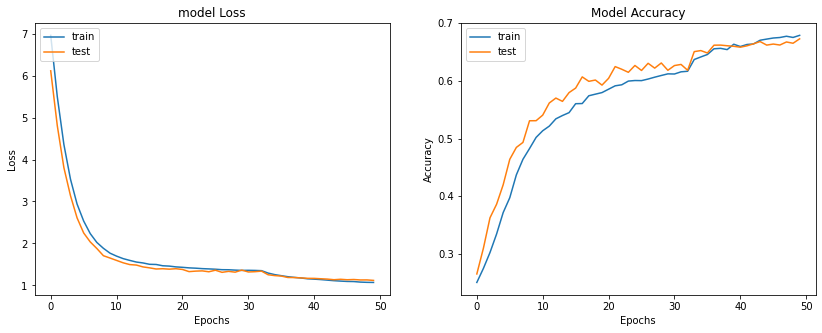

In [ ]:
# visualization metrics plot
# accuracy
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

#Loss
plt.subplot(1,2,1)
plt.plot(model_2_hist.history['loss'])
plt.plot(model_2_hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Inference

###The **training** gave accuracy of **66.64%** and **validation accuracy** is **66.10%**, which is pretty good. Hence i have used this model for final Face Emotion Recognition.

###Since validation accuracy is slightly less than training accuracy, hence there is no overfitting in our model.

###After verifying from live video , it gave good results.

###One drawback of this system is that some Disgust faces are not predicted correctly most of the time, Because there are less no. of disgust faces are given to train.
###There are some mislabeled data in the dataset. Hence the accuracy is little bit on a lower end(not above 70%)